In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statsmodels.api as sm
from scipy.special import gamma, loggamma, factorial
import scipy.stats
from scipy.interpolate import interp1d
from matplotlib.ticker import AutoMinorLocator 
from matplotlib import rc, font_manager
from matplotlib.lines import Line2D
from matplotlib import colors as mcolors
from mycolorpy import colorlist as mcp
from matplotlib import legend_handler
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import collections
import matplotlib
import shapely.geometry
from shapely.geometry import Point
from shapely.geometry import Polygon
import shapely.ops 
from geopy.geocoders import Nominatim
import geopandas as gpd
import mapclassify
import jenkspy
import random
import contextily as cx
import os
import rioxarray as rx
import pyreadr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from pysal.lib import weights
from libpysal.io import open as psopen
# import plots
import seaborn as sns
from datetime import datetime, timedelta
import jenkspy
import pyquadkey2
from pyquadkey2.quadkey import QuadKey

In [2]:
wd = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

## Store sum of user counts for each time stamp

In [3]:
files = sorted(os.listdir(wd + '/data/input/facebook/population/tiles/2709531524194929_2024-10-30_2024-11-14_csv'))
files = [file for file in files]

In [4]:
df = pd.DataFrame({'time': [], 'total': []})

times = []
totals = []

for i in range(len(files)):  
    try:
        file = files[i]
        df_pops = pd.read_csv(wd + '/data/input/facebook/population/tiles/2709531524194929_2024-10-30_2024-11-14_csv' + '/' + file)
    except:
        print(i)
    times.append(file[-19:-4]) 
    totals.append(np.sum(df_pops['n_crisis']))

df['time'] = times
df['total'] = totals
    

## Rescale counts

In [5]:
folders = sorted(os.listdir(wd + '/data/output/spain/facebook/population/grid-by-twindow'))
if '.DS_Store' in folders:
    folders.remove('.DS_Store')
files = []
for folder in folders:
    files_in_folder = os.listdir(wd + '/data/output/spain/facebook/population/grid-by-twindow/' + folder)
    files_in_folder = [f for f in files_in_folder if 'shp' in f]
    files.append(files_in_folder[0])

In [10]:
for i in range(len(files)):   
    
    print(i/len(files)*100)
    
    try:
        
        folder = folders[i]
        file = files[i]
        path = wd + '/data/output/spain/facebook/population/grid-by-twindow' + '/' + folder + '/' + file
        gdf = gpd.read_file(path)
        
        t = file[-19:-4]  
        h = t[-4:]
        Ntd = float(df[df['time']==t]['total'])
        Mt = np.median(df[df['time'].str.contains(h)]['total'])

        gdf['n_crisis_rescale'] = [gdf.loc[i, 'n_crisis']*Mt/Ntd for i in range(len(gdf))]
        gdf['perchange_rescale'] = [100*(gdf.loc[i, 'n_crisis_rescale'] - 
                                         gdf.loc[i, 'n_baseline'])/gdf.loc[i, 'n_baseline'] 
                                    for i in range(len(gdf))]
        
        path = wd + '/data/output/spain/facebook/population/grid-by-twindow-rescale' + '/' + file

        gdf.to_file(path[:-4] + '.gpkg')
        
    except:
        print(i)

0.0
2.2222222222222223
4.444444444444445
6.666666666666667
8.88888888888889
11.11111111111111
13.333333333333334
15.555555555555555
17.77777777777778
20.0
22.22222222222222
24.444444444444443
26.666666666666668
28.888888888888886
31.11111111111111
33.33333333333333
35.55555555555556
37.77777777777778
40.0
42.22222222222222
44.44444444444444
46.666666666666664
48.888888888888886
51.11111111111111
53.333333333333336
55.55555555555556
57.77777777777777
60.0
62.22222222222222
64.44444444444444
66.66666666666666
68.88888888888889
71.11111111111111
73.33333333333333
75.55555555555556
77.77777777777779
80.0
82.22222222222221
84.44444444444444
86.66666666666667
88.88888888888889
91.11111111111111
93.33333333333333
95.55555555555556
97.77777777777777


In [11]:
test = gpd.read_file(path[:-4] + '.gpkg')

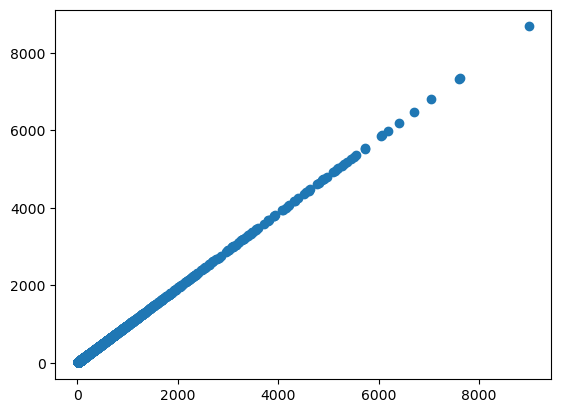

In [18]:
plt.scatter(test['n_crisis'], test['n_crisis_rescale'])